<a href="https://colab.research.google.com/github/MohdShariqMalik/MohdShariqMalik/blob/main/Skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **libraries** 

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout



**Image Preprocessing**

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/my projects/skin cancer detection/data/train', target_size = (256,256), batch_size = 12, color_mode = 'rgb', class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/my projects/skin cancer detection/data/test', target_size = (256,256), batch_size = 12, color_mode = 'rgb', class_mode = 'binary')


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/30.jpg')
img2 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/37.jpg')
img3 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/5.jpg')
img4 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/84.jpg')
img5 = cv2.imread('/content/drive/MyDrive/my projects/skin cancer detection/dummy/95.jpg')


**Model Creation**

In [ ]:
classifier = Sequential()

**CNN Layers**

In [ ]:
classifier.add(Conv2D(64, (3, 3), input_shape = (256,256,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))
classifier.add(Conv2D(16, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))



In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = classifier.fit_generator(training_set, steps_per_epoch=60, epochs = 50, validation_data=test_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
60/60 [==============================] - 16s 244ms/step - loss: 0.6968 - accuracy: 0.4995 - val_loss: 0.6561 - val_accuracy: 0.5455
Epoch 2/50
60/60 [==============================] - 15s 248ms/step - loss: 0.6534 - accuracy: 0.5475 - val_loss: 0.6021 - val_accuracy: 0.5485
Epoch 3/50
60/60 [==============================] - 15s 252ms/step - loss: 0.5890 - accuracy: 0.6656 - val_loss: 0.6619 - val_accuracy: 0.5606
Epoch 4/50
60/60 [==============================] - 14s 234ms/step - loss: 0.6650 - accuracy: 0.5497 - val_loss: 0.5248 - val_accuracy: 0.7485
Epoch 5/50
60/60 [==============================] - 14s 232ms/step - loss: 0.6568 - accuracy: 0.6745 - val_loss: 0.5068 - val_accuracy: 0.7500
Epoch 6/50
60/60 [==============================] - 15s 250ms/step - loss: 0.5790 - accuracy: 0.6471 - val_loss: 0.6888 - val_accuracy: 0.5485
Epoch 7/50
60/60 [==============================] - 15s 242ms/step - loss: 0.6898 - accuracy: 0.5283 - val_loss: 0.6948 - val_accuracy: 0.4545

**Model evaluation**

In [ ]:
classifier.evaluate(test_set)


55/55 [==============================] - 3s 49ms/step - loss: 0.3570 - accuracy: 0.8318


[0.35695257782936096, 0.831818163394928]

**Graph plots**

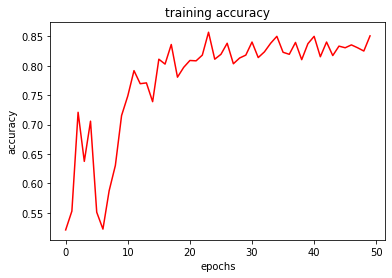

In [ ]:
plt.plot(history.history['accuracy'],'r')
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

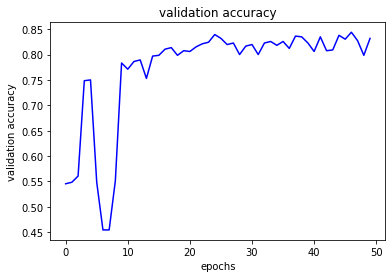

In [ ]:
plt.plot(history.history['val_accuracy'],'b')
plt.title('validation accuracy')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.show()

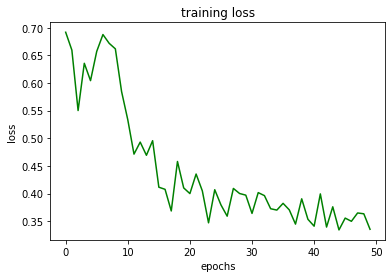

In [ ]:

plt.plot(history.history['loss'],'g')
plt.title('training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

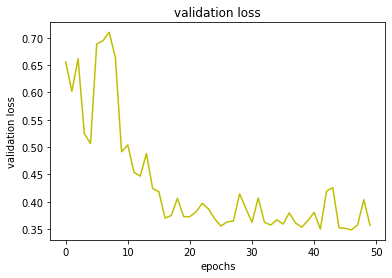

In [ ]:
plt.plot(history.history['val_loss'], 'y')
plt.title('validation loss')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.show()

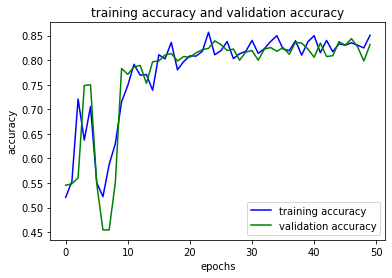

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy,'b', label = 'training accuracy')
plt.plot(validation_accuracy,'g', label = 'validation accuracy')
plt.title('training accuracy and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

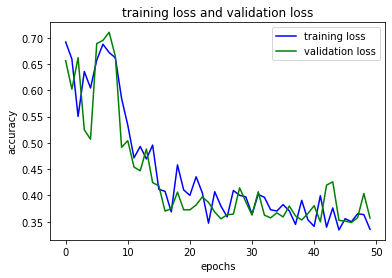

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(training_loss,'b', label = 'training loss')
plt.plot(validation_loss,'g', label = 'validation loss')
plt.title('training loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()